In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Crimes_-_2018.csv')
data.dropna(inplace=True)
data = data.loc[(data['Primary Type'] == 'THEFT')]
data['Date'] = data['Date'].str[:10]
days = np.unique(data['Date'].values)
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
66,11535234,JB553091,12/07/2018,0000X N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,...,42.0,32.0,06,1176364.0,1900524.0,2018,04/08/2019 04:11:13 PM,41.882394,-87.627845,"(41.882394062, -87.627844798)"
67,11534936,JB552789,12/10/2018,0000X N STATE ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,42.0,32.0,06,1176364.0,1900524.0,2018,04/08/2019 04:11:13 PM,41.882394,-87.627845,"(41.882394062, -87.627844798)"
76,11526910,JB541954,12/06/2018,025XX W PETERSON AVE,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),True,False,...,40.0,2.0,06,1158504.0,1941992.0,2018,04/07/2019 03:58:05 PM,41.996569,-87.692288,"(41.996569131, -87.692288143)"
170,11549187,JB570115,12/28/2018,004XX W MARQUETTE RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,6.0,68.0,06,1174441.0,1860502.0,2018,04/03/2019 04:04:24 PM,41.772613,-87.636099,"(41.772613371, -87.636098706)"
174,11498102,JB502817,11/04/2018,017XX W 66TH ST,0820,THEFT,$500 AND UNDER,RESIDENCE,True,False,...,15.0,67.0,06,1165934.0,1860929.0,2018,04/03/2019 04:04:24 PM,41.773970,-87.667271,"(41.773970137, -87.667270917)"


In [3]:
data = data.drop(['ID', 'Domestic','X Coordinate', 'Y Coordinate', 'Year', 'Community Area','District'], axis=1)

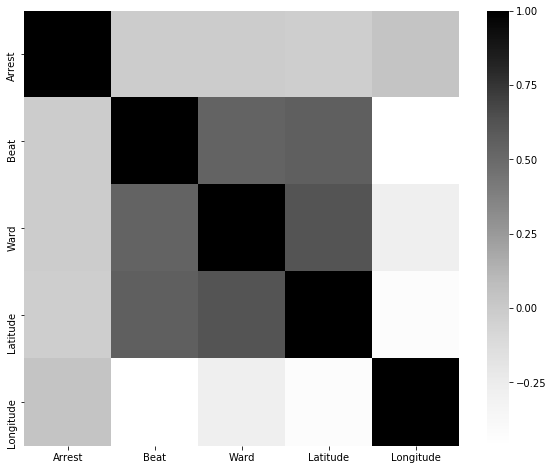

In [4]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns_plot = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='Greys',
            square=True, ax=ax)
sns_plot.figure.savefig('correlation.pdf', bbox_inches='tight')

In [5]:
data.Date = pd.to_datetime(data.Date, format='%m/%d/%Y')
data.index = pd.DatetimeIndex(data.Date)
data['Dayoftheweek'] = data['Date'].index.day_name()

In [6]:
data

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Beat,Ward,FBI Code,Updated On,Latitude,Longitude,Location,Dayoftheweek
Date,,,,,,,,,,,,,,,,
2018-12-07,JB553091,2018-12-07,0000X N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,112,42.0,06,04/08/2019 04:11:13 PM,41.882394,-87.627845,"(41.882394062, -87.627844798)",Friday
2018-12-10,JB552789,2018-12-10,0000X N STATE ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,112,42.0,06,04/08/2019 04:11:13 PM,41.882394,-87.627845,"(41.882394062, -87.627844798)",Monday
2018-12-06,JB541954,2018-12-06,025XX W PETERSON AVE,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),True,2011,40.0,06,04/07/2019 03:58:05 PM,41.996569,-87.692288,"(41.996569131, -87.692288143)",Thursday
2018-12-28,JB570115,2018-12-28,004XX W MARQUETTE RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,722,6.0,06,04/03/2019 04:04:24 PM,41.772613,-87.636099,"(41.772613371, -87.636098706)",Friday
2018-11-04,JB502817,2018-11-04,017XX W 66TH ST,0820,THEFT,$500 AND UNDER,RESIDENCE,True,725,15.0,06,04/03/2019 04:04:24 PM,41.773970,-87.667271,"(41.773970137, -87.667270917)",Sunday
2018-01-28,JB132506,2018-01-28,065XX S DR MARTIN LUTHER KING JR DR,0810,THEFT,OVER $500,HOTEL/MOTEL,True,312,20.0,06,03/31/2019 04:07:36 PM,41.775835,-87.615515,"(41.775834643, -87.615515144)",Sunday
2018-03-20,JC194196,2018-03-20,001XX W ROOSEVELT RD,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,123,2.0,06,03/23/2019 03:54:30 PM,41.867346,-87.632166,"(41.867346388, -87.632166244)",Tuesday
2018-02-24,JB163731,2018-02-24,051XX W NORTH AVE,0820,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,True,2533,37.0,06,03/22/2019 04:12:14 PM,41.909513,-87.754982,"(41.909512571, -87.754982277)",Saturday
2018-10-01,JC104316,2018-10-01,022XX S WESTERN AVE,0810,THEFT,OVER $500,GROCERY FOOD STORE,True,1034,28.0,06,03/21/2019 04:06:59 PM,41.851804,-87.685635,"(41.851804072, -87.68563492)",Monday


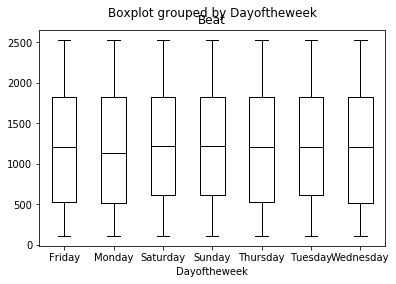

In [12]:
sns_plot = data.boxplot(by ='Dayoftheweek', column =['Beat'], grid = False)
plt.setp(sns_plot.artists, edgecolor = 'k', facecolor='w')
plt.setp(sns_plot.lines, color='k')
sns_plot.figure.savefig('boxplotday.pdf', bbox_inches='tight')